In [ ]:
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Charger les données des recettes
data = pd.read_csv('data/cleaned_recipes_.csv')

In [3]:
data.shape

(334580, 20)

In [9]:

# Caractéristiques à utiliser pour le clustering
features = ['Calories', 'FatContent', 'ProteinContent', 'CarbohydrateContent']

# Pondération des calories
data['CaloriesWeighted'] = data['Calories'] * 2.0

# Liste des caractéristiques modifiées pour inclure la pondération
features = ['CaloriesWeighted', 'FatContent', 'ProteinContent', 'CarbohydrateContent']

# Normalisation des données
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data[features])

# Application de K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(normalized_data)

# Suppression de la colonne temporaire si nécessaire
data.drop(columns=['CaloriesWeighted'], inplace=True)

recipes_cluster = data.copy()



In [10]:
# Afficher les clusters avec un graphique (PCA pour la réduction dimensionnelle)
def plot_clusters(recipes, kmeans):
    features = ['Calories', 'FatContent', 'ProteinContent', 'CarbohydrateContent']
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(recipes[features])
    
    plt.figure(figsize=(10, 8))
    
    # Affichage des points de chaque cluster avec des couleurs différentes
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=recipes['Cluster'], cmap='viridis', marker='o', alpha=0.6)

    # Ajouter des informations sur les clusters
    centroids = kmeans.cluster_centers_
    pca_centroids = pca.transform(centroids)
    
    # Afficher les centroids en rouge
    plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], marker='X', color='red', s=200, label='Centroides des clusters')

    # Ajouter une légende de couleur pour les clusters
    cbar = plt.colorbar(scatter)
    cbar.set_label('Cluster')

    # Ajouter des légendes et des titres
    plt.title('Clusters de recettes basés sur les données nutritionnelles', fontsize=14)
    plt.xlabel('Composant principal 1', fontsize=12)
    plt.ylabel('Composant principal 2', fontsize=12)
    
    # Afficher les moyennes des caractéristiques nutritionnelles pour chaque cluster
    for i in range(kmeans.n_clusters):
        cluster_data = recipes[recipes['Cluster'] == i]

        # Calculer les moyennes des caractéristiques
        mean_calories = cluster_data['Calories'].mean()
        mean_fat = cluster_data['FatContent'].mean()
        mean_protein = cluster_data['ProteinContent'].mean()
        mean_carb = cluster_data['CarbohydrateContent'].mean()

        
        print(f"Cluster {i}:")
        print(f" - Moyenne des calories: {mean_calories:.2f} kcal")
        print(f" - Moyenne des graisses: {mean_fat:.2f} g")
        print(f" - Moyenne des protéines: {mean_protein:.2f} g")
        print(f" - Moyenne des glucides: {mean_carb:.2f} g")
        print("-" * 40)

    # Afficher la légende des clusters
    handles, labels = scatter.legend_elements()
    plt.legend(handles, labels, title="Clusters", loc="upper right")

    plt.show()


In [11]:
data.head()

,RecipeId,Name,CookTime,RecipeServings,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,FatContent,...,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,HealthStatus,MealType,Cluster
0,38,Low-Fat Berry Blue Frozen Dessert,1 day,4.0,Frozen Desserts,"['4', '1/4', '1', '1']","blueberries, granulated sugar, vanilla yogurt,...",4.5,170.9,2.5,...,8.0,29.8,37.1,3.6,30.2,3.2,"['Toss 2 cups berries with sugar.', 'Let stand...",Unhealthy,Breakfast,0
1,39,Biryani,25 minutes,6.0,Chicken Breast,[],"saffron, milk, hot green chili peppers, onions...",3.0,1110.7,58.8,...,372.8,368.4,84.4,9.0,20.4,63.4,['Soak saffron in warm milk for 5 minutes and ...,Unhealthy,Dinner_Lunch,1
2,40,Best Lemonade,5 minutes,4.0,Beverages,[],"sugar, lemons, rind of, lemon, zest of, fresh ...",4.5,311.1,0.2,...,0.0,1.8,81.5,0.4,77.2,0.3,"['Into a 1 quart Jar with tight fitting lid, p...",Unhealthy,Other,0
3,41,Carina's Tofu-Vegetable Kebabs,20 minutes,2.0,Soy/Tofu,"['12', '1', '2', '1', '10', '1', '3', '2', '2'...","extra firm tofu, eggplant, zucchini, mushrooms...",4.5,536.1,24.0,...,0.0,1558.6,64.2,17.3,32.1,29.3,"['Drain the tofu, carefully squeezing out exce...",Unhealthy,Other,1
4,42,Cabbage Soup,30 minutes,4.0,Vegetable,"['46', '4', '1', '2', '1']","plain tomato juice, cabbage, onion, carrots, c...",4.5,103.6,0.4,...,0.0,959.3,25.1,4.8,17.7,4.3,['Mix everything together and bring to a boil....,Healthy,Dinner_Lunch,0


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Cluster 0:
 - Moyenne des calories: 225.42 kcal
 - Moyenne des graisses: 10.06 g
 - Moyenne des protéines: 9.02 g
 - Moyenne des glucides: 24.86 g
----------------------------------------
Cluster 1:
 - Moyenne des calories: 659.16 kcal
 - Moyenne des graisses: 35.38 g
 - Moyenne des protéines: 31.22 g
 - Moyenne des glucides: 54.06 g
----------------------------------------


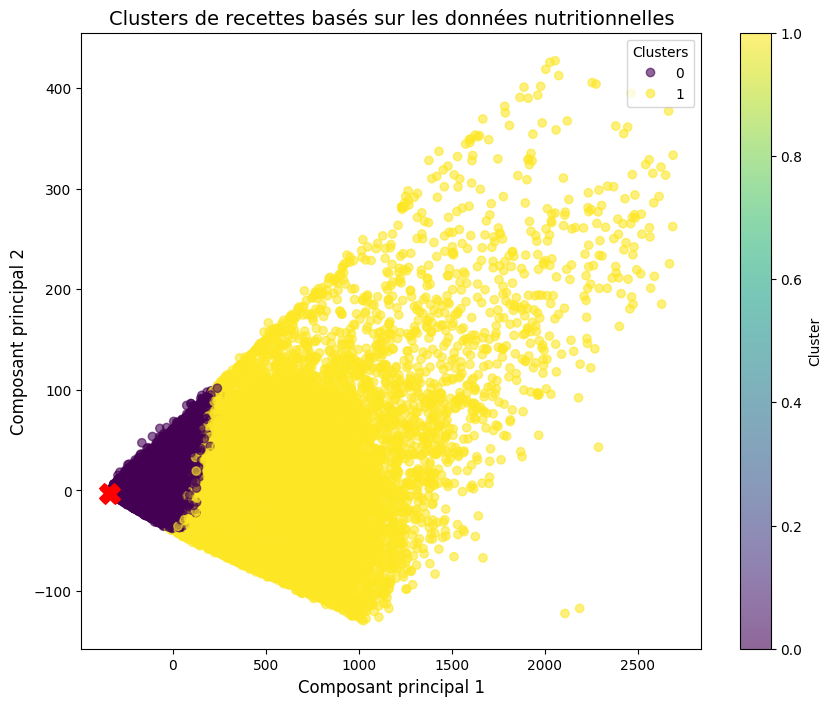

Cluster 0:
 - Moyenne des calories: 225.42 kcal
----------------------------------------
Cluster 1:
 - Moyenne des calories: 659.16 kcal
----------------------------------------


In [12]:
# Visualiser les clusters
plot_clusters(recipes_cluster, kmeans)


# Afficher les informations des clusters
for i in range(kmeans.n_clusters):
    cluster_data = recipes_cluster[recipes_cluster['Cluster'] == i]
    mean_calories = cluster_data['Calories'].mean()
    print(f"Cluster {i}:")
    print(f" - Moyenne des calories: {mean_calories:.2f} kcal")
    print("-" * 40)

In [ ]:
# Fonction pour calculer les besoins caloriques journaliers (formule de Mifflin-St Jeor)
def calculate_daily_calories(weight, height, age, sex, goal_weight):
    if sex == 'male':
        bmr = 10 * weight + 6.25 * height - 5 * age + 5
    else:
        bmr = 10 * weight + 6.25 * height - 5 * age - 161
    daily_calories = bmr + (goal_weight - weight) * 500 / abs(goal_weight - weight if goal_weight != weight else 1)
    return daily_calories

# Calculer les besoins en macronutriments
def calculate_macronutrients(daily_calories):
    protein_percentage = 0.15  # 15% des calories
    fat_percentage = 0.25      # 25% des calories
    carb_percentage = 0.60     # 60% des calories
    
    protein_grams = (daily_calories * protein_percentage) / 4
    fat_grams = (daily_calories * fat_percentage) / 9
    carb_grams = (daily_calories * carb_percentage) / 4
    
    return protein_grams, fat_grams, carb_grams

# Répartition des calories entre les repas
def distribute_calories(daily_calories):
    breakfast_calories = daily_calories * 0.25
    lunch_calories = daily_calories * 0.40
    dinner_calories = daily_calories * 0.35
    return breakfast_calories, lunch_calories, dinner_calories


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

def recommend_recipes_with_clusters(calories, protein_grams, fat_grams, carb_grams, kmeans ,recipes, n_neighbors=5, max_recipes=5):
    """
    Recommander des recettes similaires en fonction des macronutriments et du type de repas.
    
    Paramètres :
        - calories : Nombre de calories de la requête.
        - protein_grams : Grammes de protéines de la requête.
        - fat_grams : Grammes de graisses de la requête.
        - carb_grams : Grammes de glucides de la requête.
        - recipes : DataFrame contenant les recettes avec leurs caractéristiques.
        - meal_type : Type de repas (par exemple, 'Breakfast', 'Lunch', 'Dinner').
        - n_neighbors : Nombre de voisins à considérer pour KNN.
        - max_recipes : Nombre maximum de recettes à retourner.
    
    Retour :
        - Un DataFrame contenant les recettes recommandées.
    """
    # Créer une requête sous forme de tableau
    query = np.array([[calories, fat_grams, protein_grams, carb_grams]])

    # Prédire le cluster auquel appartient la requête
    cluster = kmeans.predict(query)[0]
    cluster_recipes = recipes[recipes['Cluster'] == cluster]

    
    # Vérifier si des recettes existent pour ce type de repas
    if cluster_recipes.empty:
        print(f"Aucune recette trouvée dans le cluster {cluster}.")
        return pd.DataFrame()  # Retourner un DataFrame vide
    
    # Appliquer KNN pour trouver les recettes les plus proches
    knn = NearestNeighbors(n_neighbors=n_neighbors)
    knn.fit(cluster_recipes[['Calories', 'FatContent', 'ProteinContent', 'CarbohydrateContent']].values)
    distances, indices = knn.kneighbors(query)
    
    # Extraire les recettes recommandées
    recommended_recipes = cluster_recipes.iloc[indices[0]]
    
    # Retourner au maximum `max_recipes` recettes
    return recommended_recipes.head(max_recipes)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

query = np.array([[calories, fat_grams, protein_grams, carb_grams]])
cluster = kmeans.predict(query)[0]
cluster_recipes = recipes[recipes['Cluster'] == cluster]

if cluster_recipes.empty:
        print(f"Aucune recette trouvée dans le cluster {cluster}.")
        pd.DataFrame()  # Retourner un DataFrame vide

# Appliquer KNN pour trouver les recettes les plus proches
knn = NearestNeighbors(n_neighbors=5)
knn.fit(cluster_recipes[['Calories', 'FatContent', 'ProteinContent', 'CarbohydrateContent']].values)
distances, indices = knn.kneighbors(query)
# Extraire les recettes recommandées
recommended_recipes = cluster_recipes.iloc[indices[0]]
    

    



In [ ]:
import pandas as pd

def get_user_input():
    """Demande les informations nécessaires à l'utilisateur."""
    print("\nVeuillez fournir les informations suivantes :")
    try:
        weight = float(input("Votre poids actuel (kg) : "))
        height = float(input("Votre taille (cm) : "))
        age = int(input("Votre âge (ans) : "))
        sex = input("Votre sexe (Homme/Femme) : ").strip().lower()
        if sex not in ['homme', 'femme']:
            raise ValueError("Sexe invalide. Veuillez entrer 'Homme' ou 'Femme'.")
        goal_weight = float(input("Votre poids objectif (kg) : "))
    except ValueError as e:
        print(f"Erreur : {e}. Veuillez recommencer.")
        return get_user_input()
    
    return weight, height, age, sex, goal_weight

In [ ]:


print("Bienvenue dans l'application de recommandation de recettes !")

# Obtenir les informations utilisateur
weight, height, age, sex, goal_weight = get_user_input()


# Calcul des besoins caloriques et macronutriments
daily_calories = calculate_daily_calories(weight, height, age, sex, goal_weight)
print(f"\nVos besoins caloriques journaliers sont estimés à : {daily_calories:.2f} kcal")

protein_grams, fat_grams, carb_grams = calculate_macronutrients(daily_calories)
print(f"Besoins journaliers en macronutriments :")
print(f"- Protéines : {protein_grams:.2f} g")
print(f"- Graisses : {fat_grams:.2f} g")
print(f"- Glucides : {carb_grams:.2f} g")

# Distribution des calories par repas
breakfast_calories, lunch_calories, dinner_calories = distribute_calories(daily_calories)
print(f"\nCalories recommandées par repas :")
print(f"- Petit déjeuner : {breakfast_calories:.2f} kcal")
print(f"- Déjeuner : {lunch_calories:.2f} kcal")
print(f"- Dîner : {dinner_calories:.2f} kcal")

print("\nRecettes recommandées pour chaque repas :\n")

# Recommandations par repas
for meal, calories in zip(['Breakfast', 'Lunch', 'Dinner'], [breakfast_calories, lunch_calories, dinner_calories]):
    print(f"{meal.capitalize()}")
    print("-" * 80)
    if( meal == 'Lunch' or meal== 'Dinner'):meal_ = 'Dinner_Lunch'
    else:meal_ = 'Breakfast'
    meal_recipes = get_recipes_for_meal(meal_, recipes_cluster)

    if meal_recipes.empty:
        print(f"Aucune recette trouvée pour {meal}.\n")
        continue
    # Recommander des recettes pour le cluster et afficher les résultats
    recommended_recipes = recommend_recipes_with_clusters(
        calories, protein_grams, fat_grams, carb_grams,  kmeans , meal_recipes 
    )
    
    if recommended_recipes.empty:
        print(f"Aucune recette trouvée pour le  {meal}.\n")
    else:
        print(recommended_recipes[['Name', 'Calories', 'FatContent', 'ProteinContent', 'CarbohydrateContent']])
        print("\n")


In [14]:
import joblib

joblib.dump(kmeans, 'kmeans_diet.pkl')


joblib.dump(scaler, 'scaler_diet.pkl')

['scaler_diet.pkl']